In [1]:
import numpy as np
import random
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import timeit

# Create Graph

In [2]:
def graph(Folder_name):
    adj_nodes = []
    temp = open(str(Folder_name),'r')
    for line in temp:
        x = line.split()
        x = list(map(int,x))
        adj_nodes.append(x)
    numNodes = adj_nodes[0][0]
    adj_nodes = adj_nodes[1:]
    
    G = nx.Graph()
    for i in range(0,numNodes):
        G.add_node(i+1)
    for i in range(0,numNodes):
        for j in adj_nodes[i]:
            G.add_edge(i+1,j)
    
    title = str(Folder_name).strip('.graph')+' Dataset'
    
    return G, adj_nodes, numNodes, title

In [9]:
def draw_graph(G, title):
    nx.draw(G, nodecolor = 'blue', edge_color = 'black')
    plt.draw()
    plt.title(str(title))
    plt.show()


# Explore the DIMACS dataset

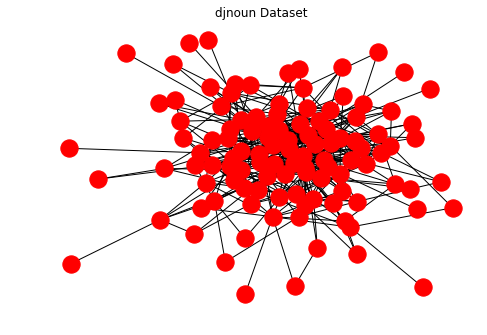

112

In [55]:
G, adj_nodes, numNodes, title = graph('adjnoun.graph')
draw_graph(G, title)
numNodes

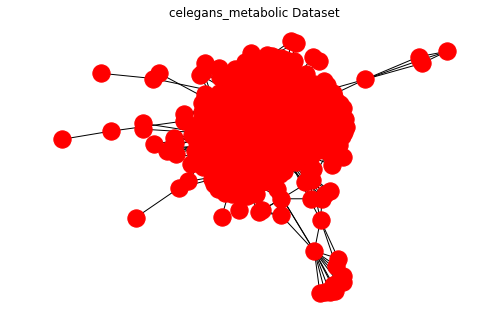

453

In [56]:
G, adj_nodes, numNodes, title = graph('celegans_metabolic.graph')
draw_graph(G, title)
numNodes

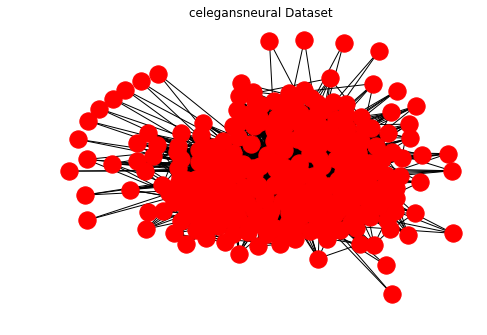

297

In [57]:
G, adj_nodes, numNodes, title = graph('celegansneural.graph')
draw_graph(G, title)
numNodes

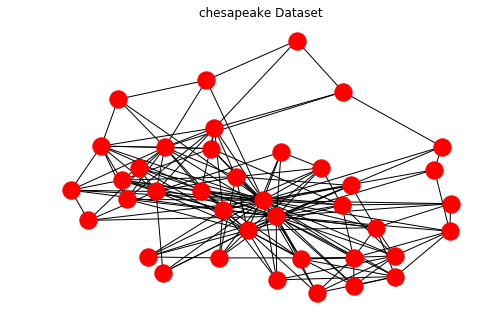

39

In [58]:
G, adj_nodes, numNodes, title = graph('chesapeake.graph')
draw_graph(G, title)
numNodes

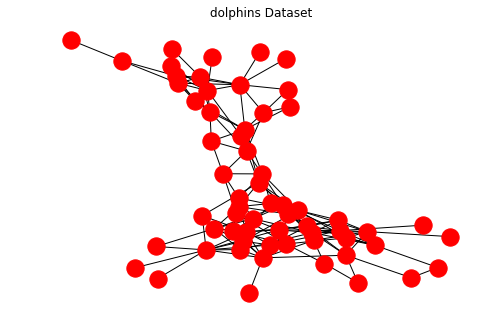

62

In [60]:
G, adj_nodes, numNodes, title = graph('dolphins.graph')
draw_graph(G, title)
numNodes

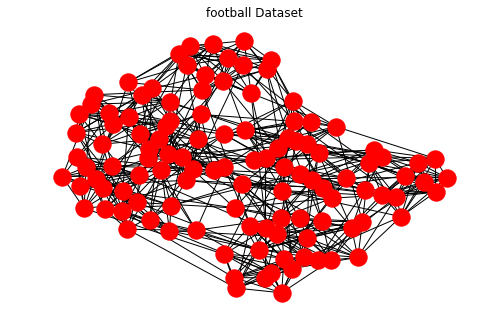

115

In [61]:
G, adj_nodes, numNodes, title = graph('football.graph')
draw_graph(G, title)
numNodes

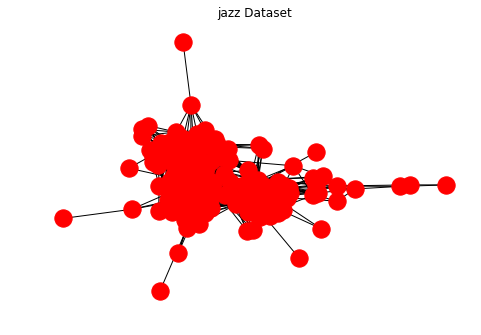

198

In [65]:
G, adj_nodes, numNodes, title = graph('jazz.graph')
draw_graph(G, title)
numNodes

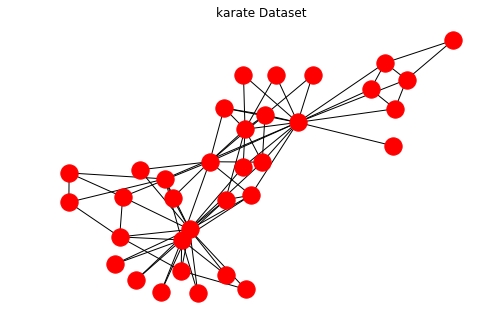

34

In [62]:
G, adj_nodes, numNodes, title = graph('karate.graph')
draw_graph(G, title)
numNodes

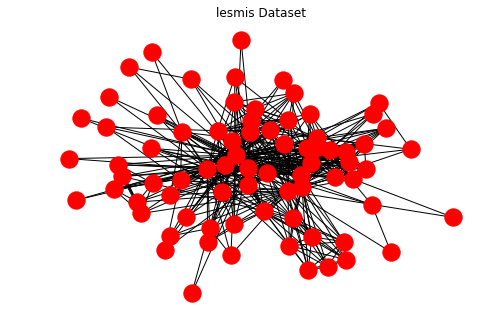

77

In [63]:
G, adj_nodes, numNodes, title = graph('lesmis.graph')
draw_graph(G, title)
numNodes

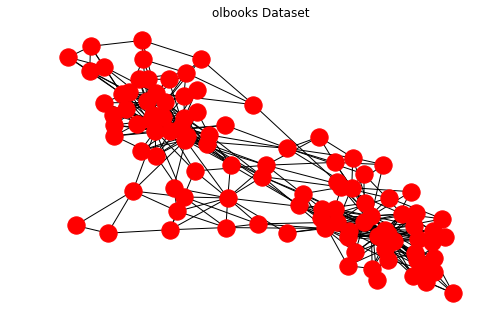

105

In [64]:
G, adj_nodes, numNodes, title = graph('polbooks.graph')
draw_graph(G, title)
numNodes

# MIS -1 

In [49]:
def MIS_1(g):
    
    if len(g.edges)==0:
        return g.number_of_nodes()
    else:
        g1 = g.copy()
        g2 = g.copy()
        to_remove = []
        nodes = list(g.nodes())
        for n in nodes:
            if (g.degree(n) != 0):
                to_remove.append(n)
        index = random.choice(to_remove)        
        g1.remove_node(index)
        #draw_graph(g, 'First')
        a = MIS_1(g1)
        
        for i in list(g.neighbors(index)):
            g2.remove_node(i)
        g2.remove_node(index)
        b = 1+MIS_1(g2)
        
        return(max(a,b))

### chesapeake

In [32]:
G, adj_nodes, numNodes, title = graph('chesapeake.graph')
start = timeit.default_timer()
ans = MIS_1(G)
stop = timeit.default_timer()
    
print('Maximum Independent Set = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Maximum Independent Set =  17
Time Required for chesapeake Dataset  = 4721.442986562834  mili-second
Number of Nodes =  39


### karate

In [31]:
G, adj_nodes, numNodes, title = graph('karate.graph')
start = timeit.default_timer()
ans = MIS_1(G)
stop = timeit.default_timer()
    
print('Maximum Independent Set = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Maximum Independent Set =  20
Time Required for karate Dataset  = 691.1952979428264  mili-second
Number of Nodes =  34


# MIS - 2

In [33]:
def MIS_2(g):
    degree = []
    nodes_ = list(g.nodes())
    for i in nodes_:
        degree.append(g.degree(i))
    if all (i<2 for i in degree):
        mis_2 = g.number_of_nodes() - g.number_of_edges()
        return mis_2
    else:
        g1 = g.copy()
        g2 = g.copy()
        to_remove = []
        nodes = list(g.nodes())
        for n in nodes:
            if (g.degree(n) >= 2):
                to_remove.append(n)
        index = random.choice(to_remove)        
        g1.remove_node(index)
        #draw_graph(g, 'First')
        a = MIS_2(g1)
        
        for i in list(g.neighbors(index)):
            g2.remove_node(i)
        g2.remove_node(index)
        b = 1+MIS_2(g2)
        
        return(max(a,b))

### chesapeake

In [34]:
G, adj_nodes, numNodes, title = graph('chesapeake.graph')
start = timeit.default_timer()
ans = MIS_2(G)
stop = timeit.default_timer()
    
print('Maximum Independent Set = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Maximum Independent Set =  17
Time Required for chesapeake Dataset  = 927.7413483057444  mili-second
Number of Nodes =  39


### karate

In [36]:
G, adj_nodes, numNodes, title = graph('karate.graph')
start = timeit.default_timer()
ans = MIS_2(G)
stop = timeit.default_timer()
    
print('Maximum Independent Set = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Maximum Independent Set =  20
Time Required for karate Dataset  = 251.08608281064448  mili-second
Number of Nodes =  34


# Trying Test data to check Accuracy of Coding

- <b> MIS 1

In [40]:
def MIS_1(g):
    if len(g.edges)==0:
        return g.number_of_nodes()
    else:
        g1 = g.copy()
        g2 = g.copy()
        to_remove = []
        nodes = list(g.nodes())
        for n in nodes:
            if (g.degree(n) != 0):
                to_remove.append(n)
        index = random.choice(to_remove)        
        g1.remove_node(index)
        draw_graph(g1, 'First')
        a = MIS_1(g1)
        
        for i in list(g.neighbors(index)):
            g2.remove_node(i)
        g2.remove_node(index)
        draw_graph(g2, 'Second')
        b = 1+MIS_1(g2)
        
        return(max(a,b))

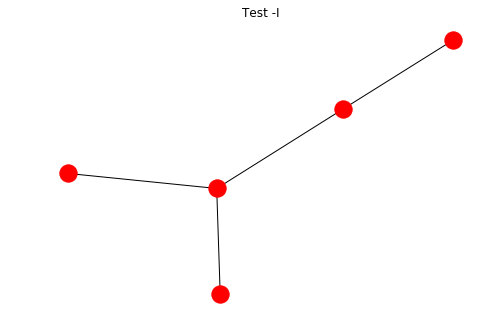

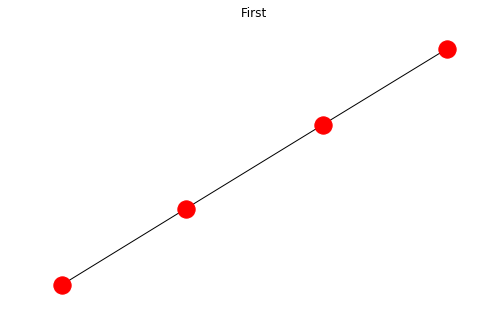

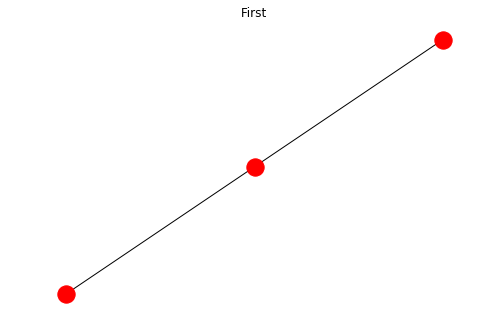

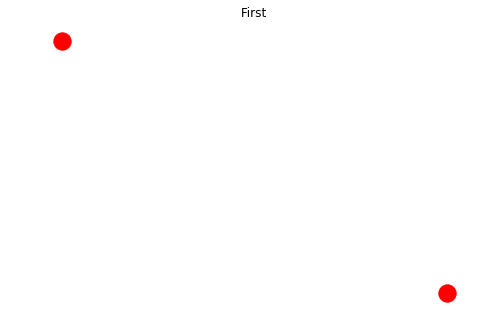

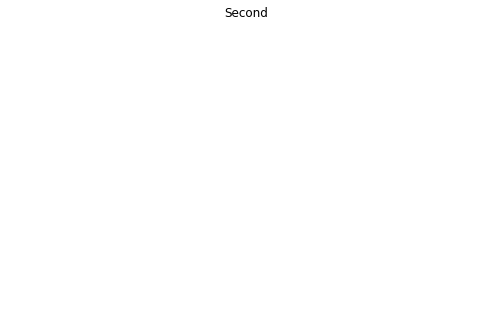

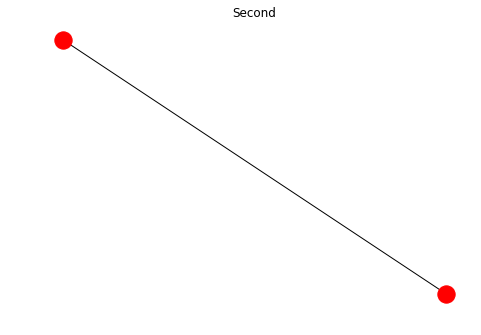

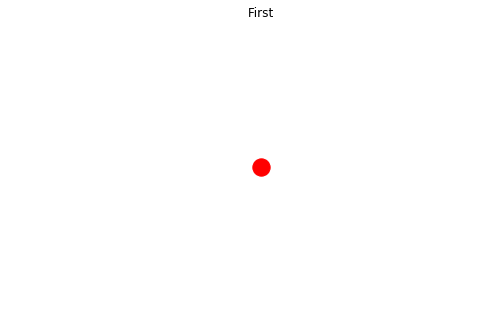

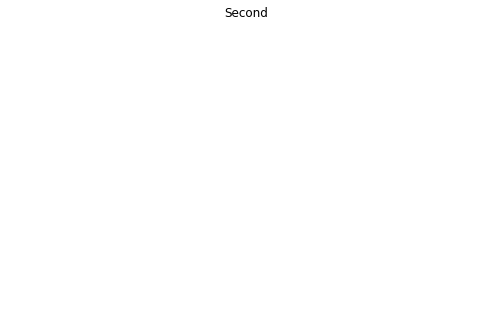

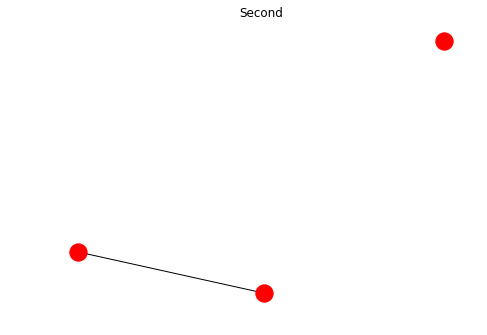

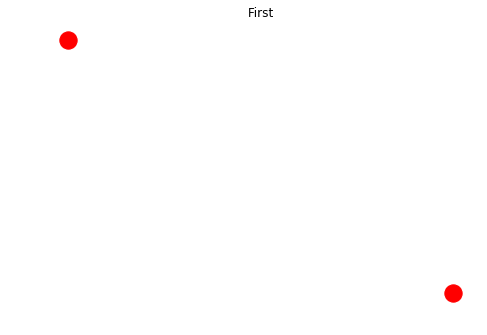

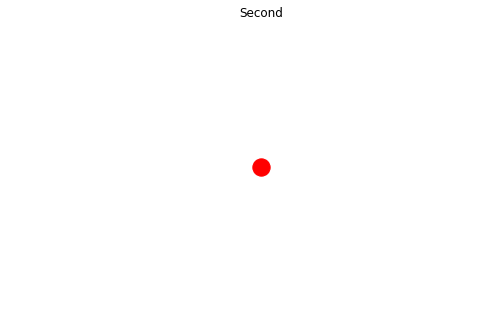

3

In [41]:
g,_,_,_ = graph('try.graph')
draw_graph(g, 'Test -I')
MIS_1(g)

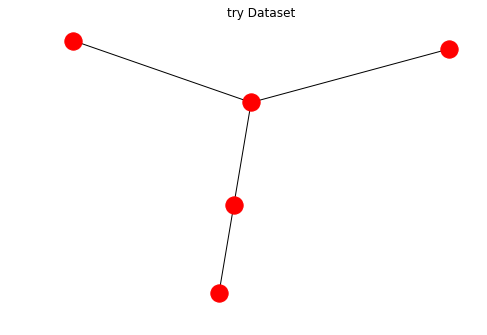

Maximum Independent Set =  3
Time Required for try Dataset  = 0.32285082124872133  mili-second
Number of Nodes =  5


In [50]:
G, adj_nodes, numNodes, title = graph('try.graph')
draw_graph(G, title)
start = timeit.default_timer()
ans = MIS_1(G)
stop = timeit.default_timer()
    
print('Maximum Independent Set = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

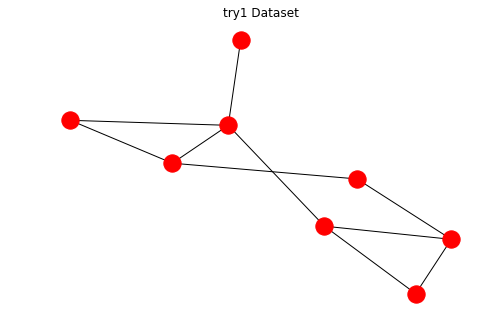

Maximum Independent Set =  4
Time Required for try1 Dataset  = 1.025171823130222  mili-second
Number of Nodes =  7


In [51]:
G, adj_nodes, numNodes, title = graph('try1.graph')
draw_graph(G, title)
start = timeit.default_timer()
ans = MIS_1(G)
stop = timeit.default_timer()
    
print('Maximum Independent Set = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

 - <b> MIS -2

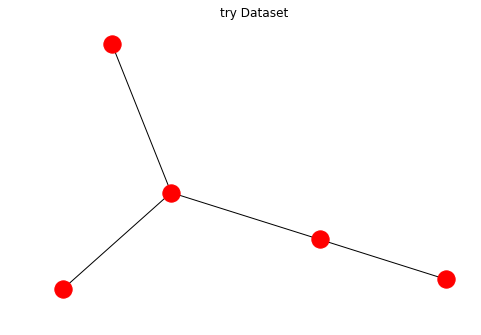

Maximum Independent Set =  3
Time Required for try Dataset  = 0.23671711369388504  mili-second
Number of Nodes =  5


In [46]:
G, adj_nodes, numNodes, title = graph('try.graph')
draw_graph(G, title)
start = timeit.default_timer()
ans = MIS_2(G)
stop = timeit.default_timer()
    
print('Maximum Independent Set = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

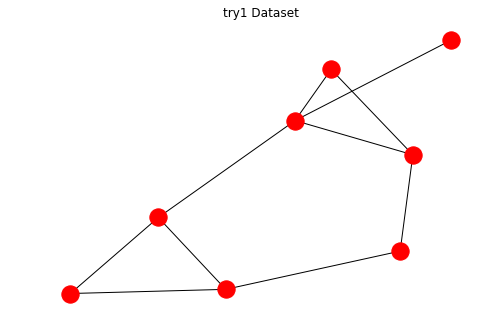

Maximum Independent Set =  4
Time Required for try1 Dataset  = 0.8357378992513986  mili-second
Number of Nodes =  7


In [47]:
G, adj_nodes, numNodes, title = graph('try1.graph')
draw_graph(G, title)
start = timeit.default_timer()
ans = MIS_2(G)
stop = timeit.default_timer()
    
print('Maximum Independent Set = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

# Minimum Vertex Cover Approximation

In [66]:
def Vertex_Cover_Approx(g):   # answer < 2C*
    if g.number_of_edges() == 0:
        return 0
    else:
        arcs = list(g.edges())
        index_arc = random.choice(arcs)
        i = index_arc[0]
        j = index_arc[1]
        g.remove_node(i)
        g.remove_node(j)
        ans = 2 + Vertex_Cover_Approx(g)
        
        return ans

In [68]:
G, adj_nodes, numNodes, title = graph('adjnoun.graph')
start = timeit.default_timer()
ans = Vertex_Cover_Approx(G)
stop = timeit.default_timer()
    
print('Approx. MVC = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Approx. MVC =  82
Time Required for djnoun Dataset  = 4.316322729209787  mili-second
Number of Nodes =  112


In [69]:
G, adj_nodes, numNodes, title = graph('celegans_metabolic.graph')
start = timeit.default_timer()
ans = Vertex_Cover_Approx(G)
stop = timeit.default_timer()
    
print('Approx. MVC = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Approx. MVC =  364
Time Required for celegans_metabolic Dataset  = 116.59883888205513  mili-second
Number of Nodes =  453


In [72]:
G, adj_nodes, numNodes, title = graph('chesapeake.graph')
start = timeit.default_timer()
ans = Vertex_Cover_Approx(G)
stop = timeit.default_timer()
    
print('Approx. MVC = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Approx. MVC =  30
Time Required for chesapeake Dataset  = 0.7562298615084728  mili-second
Number of Nodes =  39


In [73]:
G, adj_nodes, numNodes, title = graph('dolphins.graph')
start = timeit.default_timer()
ans = Vertex_Cover_Approx(G)
stop = timeit.default_timer()
    
print('Approx. MVC = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Approx. MVC =  46
Time Required for dolphins Dataset  = 1.4474076924670953  mili-second
Number of Nodes =  62


In [85]:
G, adj_nodes, numNodes, title = graph('football.graph')
start = timeit.default_timer()
ans = Vertex_Cover_Approx(G)
stop = timeit.default_timer()
    
print('Approx. MVC = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Approx. MVC =  106
Time Required for football Dataset  = 6.053452891137567  mili-second
Number of Nodes =  115


In [75]:
G, adj_nodes, numNodes, title = graph('jazz.graph')
start = timeit.default_timer()
ans = Vertex_Cover_Approx(G)
stop = timeit.default_timer()
    
print('Approx. MVC = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Approx. MVC =  180
Time Required for jazz Dataset  = 44.378134205544484  mili-second
Number of Nodes =  198


In [76]:
G, adj_nodes, numNodes, title = graph('karate.graph')
start = timeit.default_timer()
ans = Vertex_Cover_Approx(G)
stop = timeit.default_timer()
    
print('Approx. MVC = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Approx. MVC =  22
Time Required for karate Dataset  = 0.5059602426626952  mili-second
Number of Nodes =  34


In [78]:
G, adj_nodes, numNodes, title = graph('polbooks.graph')
start = timeit.default_timer()
ans = Vertex_Cover_Approx(G)
stop = timeit.default_timer()
    
print('Approx. MVC = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Approx. MVC =  90
Time Required for olbooks Dataset  = 4.198867673039786  mili-second
Number of Nodes =  105


# MVC Exact Algorithm

In [86]:
def Vertex_Cover(g):
    
    if g.number_of_edges() == 0:
        return 0
    else:
        g1 = g.copy()
        g2 = g.copy()
        arcs = list(g.edges())
        index_arc = random.choice(arcs)
        i = index_arc[0]
        j = index_arc[1]
        g1.remove_node(i)
        a = 1 + Vertex_Cover(g1)
        g2.remove_node(j)
        b = 1 + Vertex_Cover(g2)

        return(min(a,b))

In [ ]:
G, adj_nodes, numNodes, title = graph('chesapeake.graph')
start = timeit.default_timer()
ans = Vertex_Cover(G)
stop = timeit.default_timer()
    
print('Optimal MVC = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

In [88]:
G, adj_nodes, numNodes, title = graph('karate.graph')
start = timeit.default_timer()
ans = Vertex_Cover(G)
stop = timeit.default_timer()
    
print('Optimal MVC = ', ans)
time = (stop - start)*1000
print('Time Required for '+str(title) + '  = ' + str(time), ' mili-second' )
print('Number of Nodes = ', numNodes)

Optimal MVC =  14
Time Required for karate Dataset  = 206621.74352092188  mili-second
Number of Nodes =  34


# MVC using Pruning (Using Upper Bound from Approximation Algorithm)

In [90]:
def Vertex_Cover_Pruned(g, approx):
    if g.number_of_edges() == 0:
        return 0
    else:
        g1 = g.copy()
        g2 = g.copy()
        arcs = list(g.edges())
        index_arc = random.choice(arcs)
        i = index_arc[0]
        j = index_arc[1]
        g1.remove_node(i)
        if (g1.number_of_nodes() <= approx):
            return approx
        a = 1 + Vertex_Cover1(g1, approx)
        g2.remove_node(j)
        if (g2.number_of_nodes() <= approx):
            return approx
        b = 1 + Vertex_Cover1(g2, approx)
        
        return(min(a,b))
        

In [91]:
start = timeit.default_timer()
g,_,_,_ = graph('karate.graph')
approx = int(round(Vertex_Cover_Approx(g)/2))
g,_,_,_ = graph('karate.graph')
ans = Vertex_Cover_Pruned(g, approx)
stop = timeit.default_timer()
time = (stop - start)*1000
print('Time Required for '+ '  = ' + str(time), ' mili-second' )
print(ans)

Time Required for   = 91857.65139881369  mili-second
14


In [ ]:
start = timeit.default_timer()
g,_,_,_ = graph('chesapeake.graph')
approx = int(round(Vertex_Cover_Approx(g)/2))
g,_,_,_ = graph('chesapeake.graph')
ans = Vertex_Cover_Pruned(g, approx)
stop = timeit.default_timer()
time = (stop - start)*1000
print('Time Required for '+ '  = ' + str(time), ' mili-second' )
print(ans)